In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Importando o arquivo de análise dos dados
import csv
import pandas as pd

with open ('/MacEstrut3.csv', 'r') as file:
  df = pd.read_csv(file)
  print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/MacEstrut3.csv'

In [17]:
import psycopg2 as pg
import pandas as pd
conn = pg.connect(
    dbname = 'agriaco',
    host = 'localhost',
    user = 'postgres',
    password = 'postgres',
    port = 5432
    )
cur = conn.cursor()

cur.execute("""SELECT 
  estrutur.estproduto,   
  produto.pronome, 
  CASE 
  	WHEN LENGTH(produto.pronome) = 40 THEN  substring(produto.pronome, 29, 3)
	WHEN LENGTH(produto.pronome) = 41 THEN  substring(produto.pronome, 29, 3)
	WHEN LENGTH(produto.pronome) = 43 THEN  substring(produto.pronome, 29, 3)
	WHEN LENGTH(produto.pronome) = 44 THEN  substring(produto.pronome, 29, 3)
	WHEN LENGTH(produto.pronome) = 44 THEN  substring(produto.pronome, 36, 3)
	WHEN LENGTH(produto.pronome) = 48 AND produto.pronome like '%MLEC%' THEN  substring(produto.pronome, 36, 3)
	WHEN LENGTH(produto.pronome) = 48 and produto.pronome like '%MOD MLAC%' THEN  substring(produto.pronome, 33, 3)
	WHEN LENGTH(produto.pronome) = 48 and produto.pronome like '%MODELO MLAC%' THEN  substring(produto.pronome, 36, 3)
	WHEN LENGTH(produto.pronome) = 49 THEN  substring(produto.pronome, 36, 3)
  END as TN,
 produto.unimedida,
  estrutur.estfilho, 
  produtob.pronome, 
  produtob.unimedida,
  estrutur.fase, 
  estrutur.estqtduso
FROM 
  public.produto, 
  public.estrutur, 
  public.produto as produtob
WHERE 
  estrutur.estproduto = produto.produto AND
  produtob.produto = estrutur.estfilho AND
  estproduto like '360609%' AND
  produtob.proorigem = 'F'   order by 1
""")
rows = cur.fetchall()
conn.commit()


df = pd.DataFrame(rows)
df.columns = ['Cod_Pai','Desc_Pai', 'T', 'UM','Cod_Filho', 'Desc_Filho', 'UM','Fase','Qtd']
conn.close()

print(df)

                Cod_Pai                                           Desc_Pai  \
0      360609000004      MAQUINA DE PRE-LIMPEZA MODELO MLEC-120 N° AC00...   
1      360609000004      MAQUINA DE PRE-LIMPEZA MODELO MLEC-120 N° AC00...   
2      360609000004      MAQUINA DE PRE-LIMPEZA MODELO MLEC-120 N° AC00...   
3      360609000004      MAQUINA DE PRE-LIMPEZA MODELO MLEC-120 N° AC00...   
4      360609000004      MAQUINA DE PRE-LIMPEZA MODELO MLEC-120 N° AC00...   
...                 ...                                                ...   
12748  360609000452      MAQUINA DE PRE-LIMPEZA MLAC-240 V2 N°AC00452  ...   
12749  360609000452      MAQUINA DE PRE-LIMPEZA MLAC-240 V2 N°AC00452  ...   
12750  360609000452      MAQUINA DE PRE-LIMPEZA MLAC-240 V2 N°AC00452  ...   
12751  360609000452      MAQUINA DE PRE-LIMPEZA MLAC-240 V2 N°AC00452  ...   
12752  360609000452      MAQUINA DE PRE-LIMPEZA MLAC-240 V2 N°AC00452  ...   

         T  UM         Cod_Filho  \
0      120  UF  36060500000

In [27]:
import pandas as pd

# Agrupar por 'tn' e contar a frequência de 'estfilho'
top_10_itens = df.groupby('T')['Cod_Filho'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True)

# Renomear a coluna de contagem para 'count'
top_10_itens = top_10_itens.rename('count')

# Resetar o índice
top_10_itens = top_10_itens.reset_index()

# Exibir o resultado
print(top_10_itens)

      T         Cod_Filho  count
0   120  360601000229        141
1   120  360602000255        141
2   120  360602000383        141
3   120  360602000384        141
4   120  360602000391        141
5   120  351501000225        128
6   120  360602000095        111
7   120  360605000044        111
8   120  360605000051        110
9   120  360601000068        100
10  180  360601000159         85
11  180  360602000200         85
12  180  360602000229         85
13  180  360602000197         83
14  180  360602000308         83
15  180  360601000058         61
16  180  360601000060         61
17  180  360601000059         60
18  180  360605000047         59
19  180  360601000068         56
20  240  360601000159        137
21  240  360602000229        137
22  240  360602000200        136
23  240  360602000308        136
24  240  360602000197        133
25  240  351501000228        131
26  240  360601000071        110
27  240  360601000068        108
28  240  360601000060         96
29  240  3

In [35]:
import pandas as pd

# Agrupar por 'tn' e contar a frequência de 'estfilho'
top_10_itens = df.groupby('T')['Cod_Filho'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True)

# Renomear a coluna de contagem para 'count'
top_10_itens = top_10_itens.rename('count')

# Resetar o índice
top_10_itens = top_10_itens.reset_index()

# Ordenar os dados pelos mais utilizados (count) em ordem decrescente
top_10_itens = top_10_itens.sort_values(['T', 'count'], ascending=[True, False])

print(top_10_itens)

# Ex

      T         Cod_Filho  count
0   120  360601000229        141
1   120  360602000255        141
2   120  360602000383        141
3   120  360602000384        141
4   120  360602000391        141
5   120  351501000225        128
6   120  360602000095        111
7   120  360605000044        111
8   120  360605000051        110
9   120  360601000068        100
10  180  360601000159         85
11  180  360602000200         85
12  180  360602000229         85
13  180  360602000197         83
14  180  360602000308         83
15  180  360601000058         61
16  180  360601000060         61
17  180  360601000059         60
18  180  360605000047         59
19  180  360601000068         56
20  240  360601000159        137
21  240  360602000229        137
22  240  360602000200        136
23  240  360602000308        136
24  240  360602000197        133
25  240  351501000228        131
26  240  360601000071        110
27  240  360601000068        108
28  240  360601000060         96
29  240  3

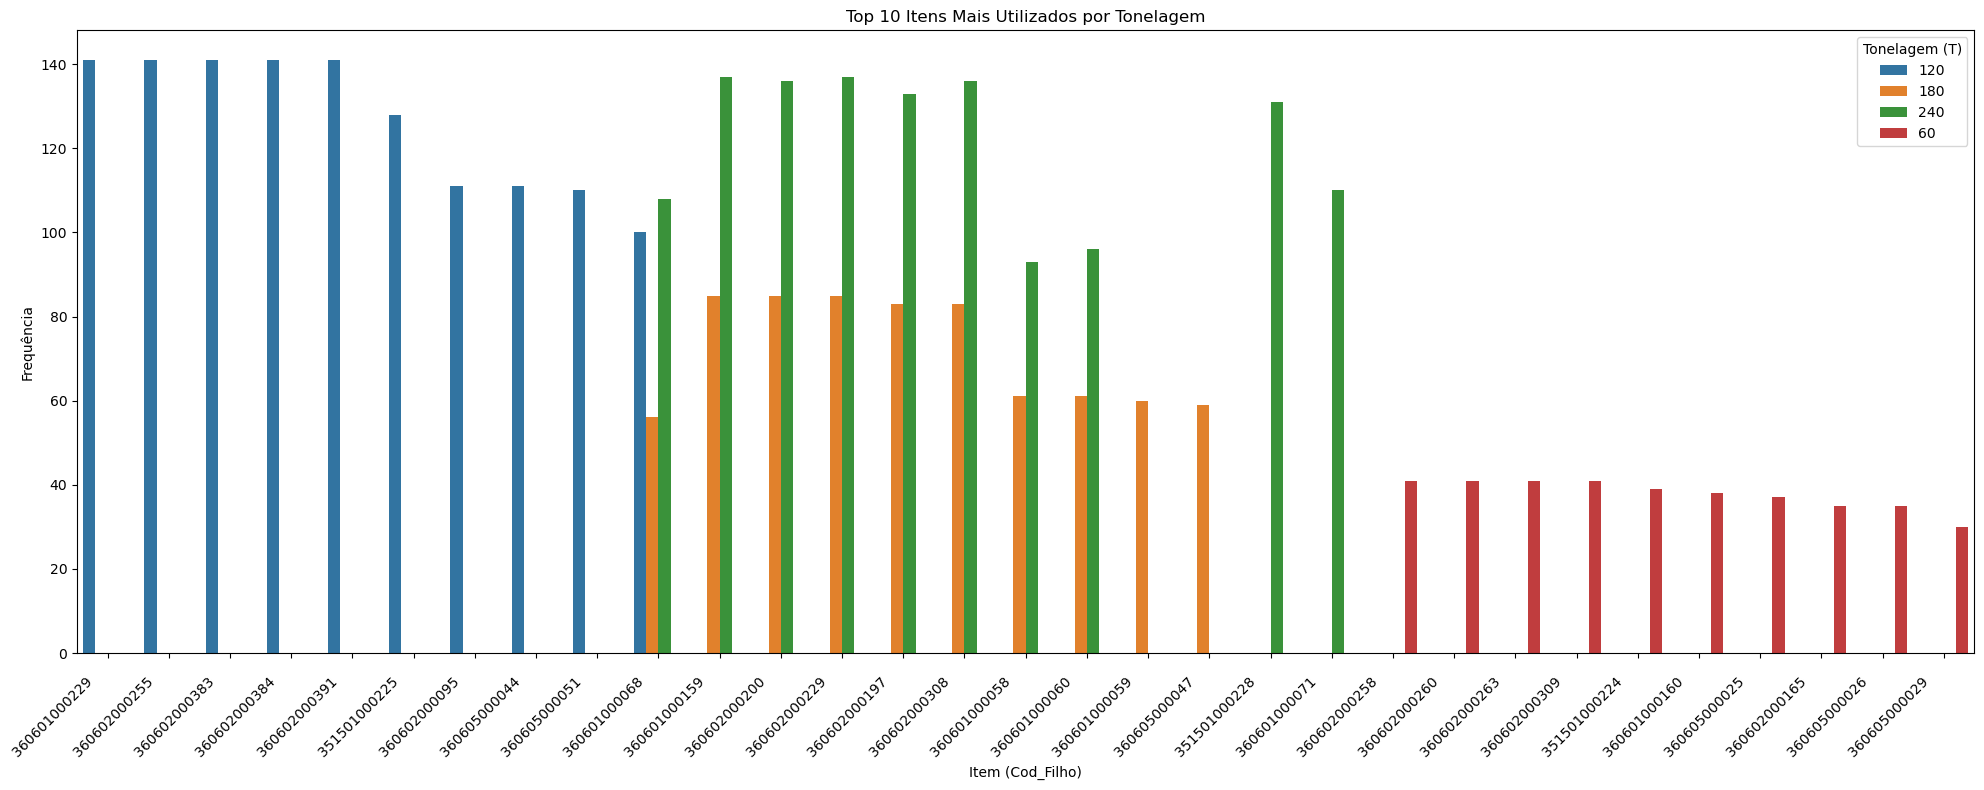

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de barras
plt.figure(figsize=(20, 8))  # Ajustar o tamanho da figura, se necessário
sns.barplot(x='Cod_Filho', y='count', hue='T', data=top_10_itens)
plt.title('Top 10 Itens Mais Utilizados por Tonelagem')
plt.xlabel('Item (Cod_Filho)')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização
plt.legend(title='Tonelagem (T)')
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de elementos
plt.show()

In [ ]:
import pandas as pd

# Agrupar por 'tn' e contar a frequência de 'estfilho'
top_10_itens = df.groupby('T')['Cod_Filho'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True)

# Renomear a coluna de contagem para 'count'
top_10_itens = top_10_itens.rename('count')

# Resetar o índice
top_10_itens = top_10_itens.reset_index()

# Ordenar os dados pelos mais utilizados (count) em ordem decrescente
top_10_itens = top_10_itens.sort_values(['T', 'count'], ascending=[True, False])

# Exibir o resultado
print(top_10_itens)

     tn      estfilho  count
0    36  351501000033      1
1    36  351501000225      1
2    36  360601000058      1
3    36  360601000059      1
4    36  360601000060      1
..  ...           ...    ...
65  360  360601000088      1
66  360  360601000190      1
67  360  360601000191      1
68  360  360601001095      1
69  360  360601001176      1

[70 rows x 3 columns]


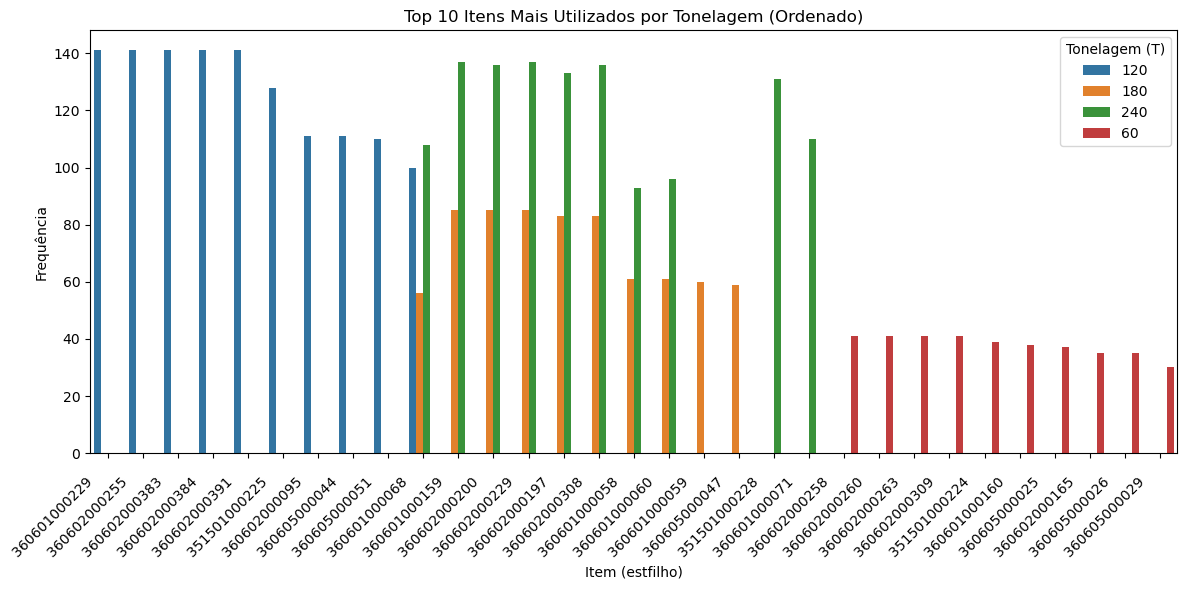

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

cores_tn = {
    60: 'blue',
    180: 'green',
    120: 'red',
    240: 'orange',

}

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))  # Ajustar o tamanho da figura, se necessário
sns.barplot(x='Cod_Filho', y='count', hue='T', data=top_10_itens)
plt.title('Top 10 Itens Mais Utilizados por Tonelagem (Ordenado)')
plt.xlabel('Item (estfilho)')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos do eixo x para melhor visualização
plt.legend(title='Tonelagem (T)')
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de elementos
plt.show()

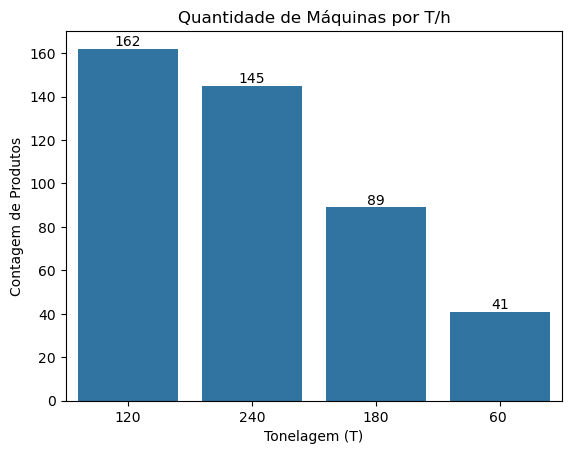

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

df_uncios = df.drop_duplicates(subset=['Desc_Pai','T'])
resultado = df_uncios.groupby('T').size().reset_index(name='Contagem_Produtos')

#Mesmo ordenando antes ou depois, grafico não altera
resultado = resultado.sort_values(by=['Contagem_Produtos'], ascending=False)

#print(resultado)

plt.figure()
ax = sns.barplot(x='T', y='Contagem_Produtos', data=resultado)
plt.title('Quantidade de Máquinas por T/h')
plt.xlabel('Tonelagem (T)')
plt.ylabel('Contagem de Produtos')

ax.bar_label(ax.containers[0])

plt.show()

In [57]:
import pandas as pd

# Assuming 'df' is your original DataFrame


top_estfilhos_by_tn = filtered_df.groupby('T')['Cod_Filho'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True)


# Rename the count column
top_estfilhos_by_tn = top_estfilhos_by_tn.rename('count')

# Reset the index
top_estfilhos_by_tn = top_estfilhos_by_tn.reset_index()

# Display the result
print(top_estfilhos_by_tn)

NameError: name 'filtered_df' is not defined

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate total machines per tonnage for filtered data
total_maq_per_tn = df.groupby('T')['Desc_Pai'].nunique().reset_index(name='total_maq')

# Get top 30 items for each tonnage
top_30_itens = filtered_df.groupby(['T', 'Cod_Filho'])['Desc_Pai'].nunique().reset_index(name='item_count') \
    .sort_values(['T', 'item_count'], ascending=[True, False]) \
    .groupby('T').head(30)

# Merge with total machines to calculate percentage usage
top_30_itens = pd.merge(top_30_itens, total_maq_per_tn, on='T', how='left')
top_30_itens['percentage_usage'] = (top_30_itens['item_count'] / top_30_itens['total_maq']) * 100
print(tn_data)

      T         Cod_Filho  item_count  total_maq  percentage_usage
0   120  360601000229             141        162         87.037037
1   120  360602000255             141        162         87.037037
2   120  360602000383             141        162         87.037037
3   120  360602000384             141        162         87.037037
4   120  360602000391             141        162         87.037037
5   120  351501000225             128        162         79.012346
6   120  360602000095             111        162         68.518519
7   120  360605000044             111        162         68.518519
8   120  360605000051             110        162         67.901235
9   120  360601000068             100        162         61.728395
10  120  360601000071             100        162         61.728395
11  120  360601000058              97        162         59.876543
12  120  360601000060              97        162         59.876543
13  120  360605000002              97        162         59.87

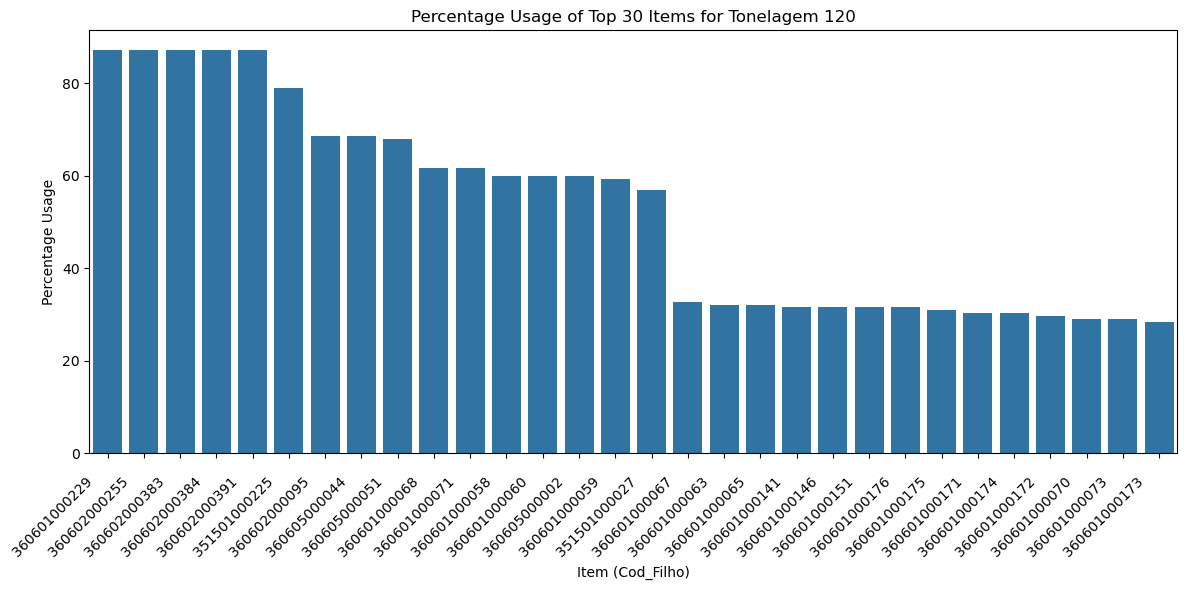

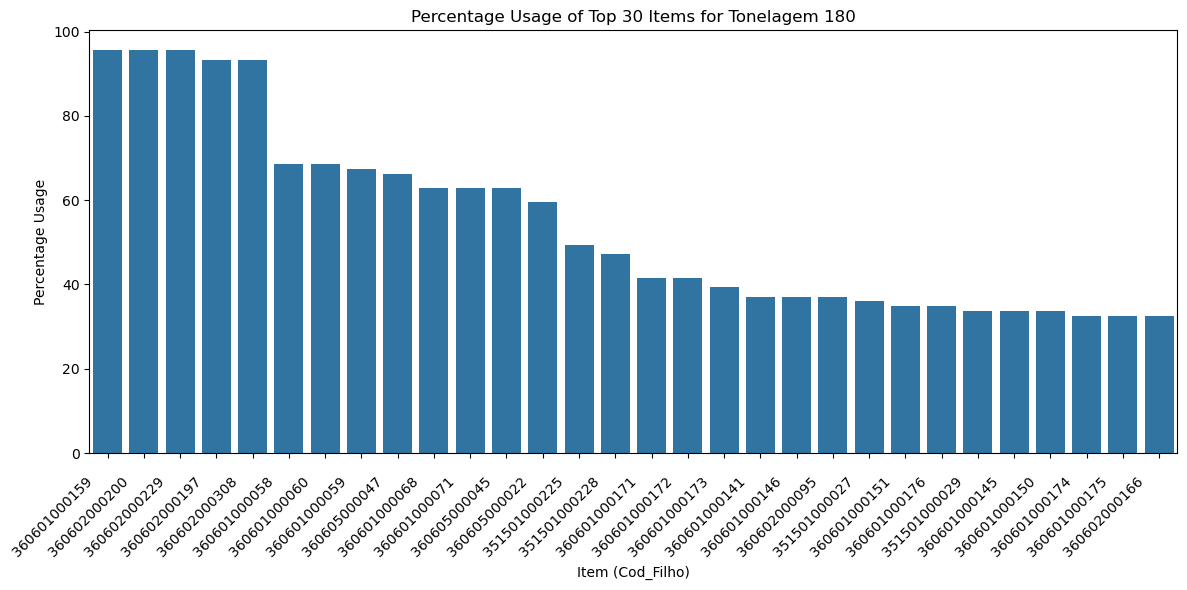

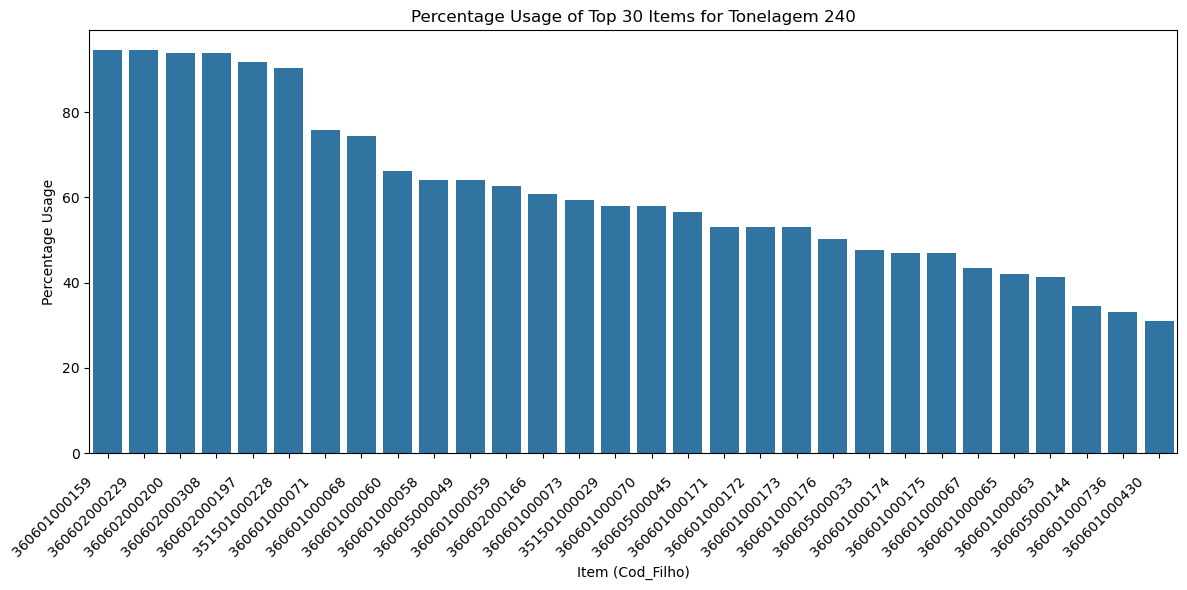

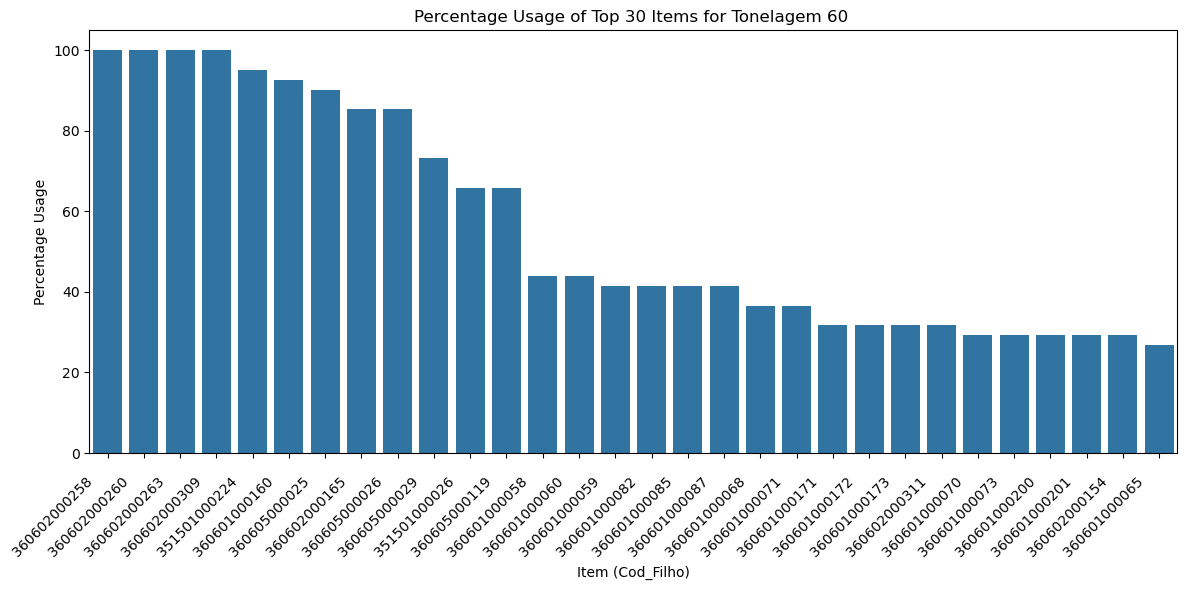

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate total machines per tonnage for filtered data
total_maq_per_tn = df.groupby('T')['Desc_Pai'].nunique().reset_index(name='total_maq')

# Get top 30 items for each tonnage
top_30_itens = df.groupby(['T', 'Cod_Filho'])['Desc_Pai'].nunique().reset_index(name='item_count') \
    .sort_values(['T', 'item_count'], ascending=[True, False]) \
    .groupby('T').head(30)

# Merge with total machines to calculate percentage usage
top_30_itens = pd.merge(top_30_itens, total_maq_per_tn, on='T', how='left')
top_30_itens['percentage_usage'] = (top_30_itens['item_count'] / top_30_itens['total_maq']) * 100
tn_data
# Create a separate graph for each tonnage
unique_tns = top_30_itens['T'].unique()
for tn in unique_tns:
    tn_data = top_30_itens[top_30_itens['T'] == tn]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Cod_Filho', y='percentage_usage', data=tn_data)
    plt.title(f'Percentage Usage of Top 30 Items for Tonelagem {tn}')
    plt.xlabel('Item (Cod_Filho)')
    plt.ylabel('Percentage Usage')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd



# Total de máquinas
total_maq_per_tn = filtered_df.groupby('T')['Desc_Pai'].nunique().reset_index(name='total_maq')
#Percentual de itens
item_usage_per_tn = filtered_df.groupby(['T', 'Cod_Filho'])['Desc_Pai'].nunique().reset_index(name='item_count')
item_usage_per_tn = pd.merge(item_usage_per_tn, total_maq_per_tn, on='T', how='left')
item_usage_per_tn = pd.merge(item_usage_per_tn, df[['T', 'Cod_Filho', 'Desc_Filho']], on=['T', 'Cod_Filho'], how='left')


item_usage_per_tn['percentage_usage'] = (item_usage_per_tn['item_count'] / item_usage_per_tn['total_maq']) * 100
item_usage_per_tn['quantity_usage'] = item_usage_per_tn['item_count']


item_usage_per_tn = item_usage_per_tn[['T', 'total_maq', 'Cod_Filho', 'Desc_Filho', 'quantity_usage', 'percentage_usage']]
item_usage_per_tn.to_csv('item_usage_by_tn.csv', index=False)

files.download('item_usage_by_tn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>